In [1]:
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt

# Initial state

In [18]:
### statevector simulation #####
circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)
circ.save_statevector()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)

In [19]:
statevector

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

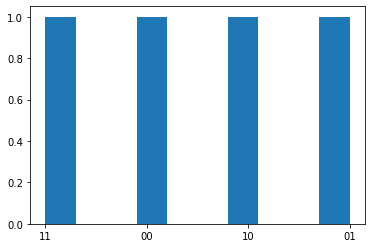

In [20]:
### measurement simulation #####
circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plt.hist(counts)

# Grover iterate

In [ ]:
def find_oracle(state_to_amplify): 
    

In [3]:
# note cur_state is a circuit
# state_to_amplify is an integer between 0 and 3 representing one of the basis states
def grover_iterate(cur_state, state_to_amplify): 
    oracle = find_oracle(state_to_amplify)
    preparation = cur_state.gates()
    projection = matrix_to_gate([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]])
    
    cur_state.append(oracle)
    cur_state.append(preparation)
    cur_state.append(projection)
    cur_state.append(preparation.inverse())
    
    return cur_state   

# Gate sets for player